<a href="https://colab.research.google.com/github/knc6/jarvis/blob/master/jjarvis/db/static/arvis_dft_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring data in JARVIS-DFT

**First Install jarvis-tools using pip install or any of the installation methods give in https://github.com/usnistgov/jarvis/blob/master/README.rst .Then, scroll down and click "RESTART RUNTIME" if you are uisng colab**

In [0]:
!pip install jarvis-tools

Now, let's get JARVIS's 3D and 2D-materials DFT datasets. The databses can be downloaded from the module below or from the figshare links:
3D-materials JSON file: https://figshare.com/articles/jdft_3d-7-7-2018_json/6815699
2D-materials JSON file: https://figshare.com/articles/jdft_2d-7-7-2018_json/6815705


In [0]:
from monty.serialization import loadfn, MontyDecoder,MontyEncoder
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import json,math,os
import numpy as np
import pandas as pd
import pprint
from jarvis.db.static.explore_db import get_3d_dataset,get_2d_dataset

dat_3d = get_3d_dataset() 
#dat_3d = loadfn('jdft_3d-6-6-2019.json',cls=MontyDecoder)
dat_2d = get_2d_dataset()
#dat_2d = loadfn('jdft_2d-6-6-2019.json',cls=MontyDecoder) 

In [2]:
# Size of the data for the 3D and 2D datasets. One could loop over them.
len(dat_3d),len(dat_2d)

(32486, 754)

# Each element in the data is a key-value pair based dictionary.



**form_enp**: formation energy per atom (eV/atom),

**op_gap**  : OptB88vdW functional based bandgap (eV),

**mbj_ga**p : TBmBJ functional based bandgap (eV),

**kv**      : Voigt bulk mod. (GPa),

**gv**      : Shear bulk mod. (GPa),

**elastic** : elastic tensor instring format, use the function 'get_et' to convert into pymatgen elastictensor object,

**epsx**    : Static dielctric function value in x-direction based on OptB88vdW (no unit),

**mepsx**   : Static dielctric function value in x-direction based on TBmBJ (no unit),

**magmom**  : Magnetic moment (Bohr magneton) (from OUTCAR and from OSZICAR), generally OSZICAR value is preferred, no DFT+U,

**kp_len**  : Kpoint automatic line density obtained after automatic convergence (Angstrom), substract 25 because 5 extra points,

**encut**   : Plane wave cut-off value obtained after automatic convergence,

**exfoliation_en**: exfoliation energy,

**phi**     : 2D work-function related values,

**final_str**: final structure after relaxation with OptB88vdW,

**eff_mass**: effective mass with BoltzTrap at 300K,

**spillage**: spin-orbit spillage as measure of band-inversion.
Here 'na' signifies non-available data# Each element in the data is a key-value pair based dictionary.




# Some of the avilable data for 3D and their sizes

In [3]:

keys=['gv','kv','fin_en','op_gap','mbj_gap','magmom','epsx','epsy','epsz','mepsx',
      'mepsy','mepsz','eff_mass','form_enp','spillage']
info={}
for i in dat_3d:
  for j in keys:
     if i[j]!='na' and i[j]!={}:
            info.setdefault(j, []).append(i['jid'])
for i,j in info.items():
    print (i,len(j))


fin_en 32486
magmom 30787
eff_mass 32486
form_enp 32486
gv 13492
kv 13492
op_gap 29672
mbj_gap 9089
epsx 29672
epsy 29672
epsz 29672
mepsx 14410
mepsy 14410
mepsz 14410
spillage 4648


In [4]:
# Some of the avilable data for 2D
keys=['phi','magmom', 'fin_en', 'op_gap',  'exfoliation_en', 'elastic', 
      'mepsz', 'mepsx', 'mepsy', 'form_enp', 'epsx', 'epsy', 'epsz', 'mbj_gap']
info={}
for i in dat_2d:
  for j in keys:
     if i[j]!='na' and i[j]!={}:
            info.setdefault(j, []).append(i['jid'])
for i,j in info.items():
    print (i,len(j))
# Band-alginment data for a 2D material
print (dat_2d[0]['phi'])

phi 754
magmom 754
fin_en 754
exfoliation_en 754
form_enp 754
op_gap 623
elastic 343
epsx 623
epsy 623
epsz 623
mepsz 167
mepsx 167
mepsy 167
mbj_gap 128
{'nelect': 38, 'phi': 4.8566275698291665, 'scf_vbm': -2.7183, 'scf_cbm': -1.235, 'Ef': -1.9703781, 'scf_gap': 1.4833, 'avg_max': 2.8862494698291665, 'scf_dir': False}


# Query example: find 5 materials with spillage>0.5 and prototype 'A2B3' and bandgap>=0.05,<2.0

In [5]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
forms=[]
for i in dat_3d:
    ano_formula=i['final_str'].composition.anonymized_formula
    formula=i['final_str'].composition.reduced_formula
    gap=i['op_gap'] # or i['phi']['scf_gap']
    if i['spillage']!='na' and i['spillage']>=0.5 and gap !='na' \
    and gap>=0.05 and gap<2.0 and ano_formula=='A2B3' and formula not in forms :
        spg=SpacegroupAnalyzer(i['final_str']).get_space_group_symbol()
        val=[formula,spg]
        forms.append(val)
        if len(forms)==5:
            break
print (forms)

[['Bi2Se3', 'Pnma'], ['Bi2Te3', 'R-3m'], ['Ca3Sb2', 'Pm-3m'], ['Sr3Bi2', 'Pm-3m'], ['Ca3Bi2', 'Pm-3m']]


# Example of plots that could be made using the JSON file:

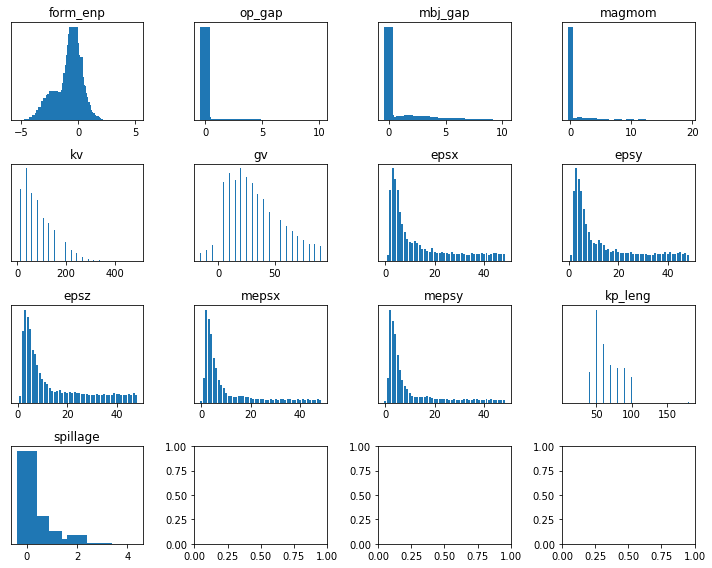

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10,8),nrows=4, ncols=4)
props={'form_enp':[ax[0,0],.1,[-5,5]],'op_gap':[ax[0,1],.1,[0,10]],'mbj_gap':[ax[0,2],.1,[0,10]],
       'magmom':[ax[0,3],.5,[0,20]],'kv':[ax[1,0],5,[-2,500]],'gv':[ax[1,1],5,[-15,100]],
       'epsx':[ax[1,2],1,[0,50]],'epsy':[ax[1,3],1,[0,50]],'epsz':[ax[2,0],1,[0,50]],
       'mepsx':[ax[2,1],1,[0,50]],'mepsy':[ax[2,2],1,[0,50]],'kp_leng':[ax[2,3],10,[10,200]],
       'spillage':[ax[3,1],.5,[0,5]],'spillage':[ax[3,0],.5,[0,5]]}

info={}
for i in dat_3d:
 for j in props.keys():
    if i[j]!='na' and i[j]!={} :
      if j=='magmom':
        val=i['magmom']['magmom_osz']
      else:
       if not math.isinf(i[j]):
         val=i[j]
      info.setdefault(j, []).append(val)


for i,j in info.items():
  
  max_val=props[i][2][1]
  min_val=props[i][2][0]
  interval=props[i][1]
  hist, bins = np.histogram(j,bins=np.arange(min_val, max_val , interval), density=False)
  ax=props[i][0]
  ax.bar(bins[:-1],hist)
  ax.set_title(i)
  ax.set_yticks([])

plt.tight_layout()



# Conventional DFT methods are known to underestimated bandgaps, however, meta-GGAs such as TBmBJ can alleviate this proble to certain extent. Let's compare Optb88vdW and TbmBJ. TBmBJ values are generally closer to experiments.

Text(0, 0.5, 'OptB88vdW bandgap (eV)')

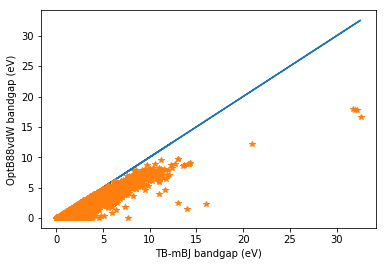

In [7]:
fig, ax = plt.subplots()
mbj=[]
opt=[]
for i in dat_3d:
    if i['op_gap']!='na' and i['mbj_gap']!='na':
        opt.append(i['op_gap'])
        mbj.append(i['mbj_gap'])
        
plt.plot(mbj,mbj)
plt.plot(mbj,opt,'*')
plt.xlabel('TB-mBJ bandgap (eV)')
plt.ylabel('OptB88vdW bandgap (eV)')

#Example of getting elastic tensor object


In [8]:
from pymatgen.analysis.elasticity.elastic import ElasticTensor
def get_et(elast_str=''):
    cij=np.empty((6, 6), dtype=float)
    elast=np.array(elast_str.split(','),dtype='float')
    count=0
    for ii in range(6):
      for jj in range(6):
       cij[ii][jj]=elast[count]
       count=count+1
    et=ElasticTensor.from_voigt(cij)
    return et
for i in dat_3d:
    if i['elastic']!='na': #In case some data is unavailable we call it 'na'
        el_tens=get_et(i['elastic'])
        break
#print (el_tens)
print ('Poisson ratio, anisotropy',el_tens.homogeneous_poisson, el_tens.universal_anisotropy)
print (i['jid'],i['mpid'],i['final_str'].composition.reduced_formula)

Poisson ratio, anisotropy 0.2468881595731997 1.9263993609180625
JVASP-4666 mp-10009 GaTe


# Using pandas dataframe

In [0]:
jid, opgap, mbjgap, energy, magmom, exfen, url =[],[],[],[],[],[],[]

In [0]:
for i in dat_2d:
    jid.append(i['jid'])
    opgap.append(i['op_gap'])
    mbjgap.append(i['mbj_gap'])
    if i["magmom"]!={}:
      magmom.append(i["magmom"]['magmom_osz'])
    else:
        magmom.append('na')
    energy.append(i['fin_en'])
    exfen.append(i['exfoliation_en'])
    url.append(str("https://www.ctcms.nist.gov/~knc6/jsmol/")+str(i['jid'])+str(".html"))

In [0]:
headers = ['JARVIS_ID','OPT_Gap','MBJ_Gap','Magnetic_moment','Final_Energy','Exfoliation_Energy','URL']

In [0]:
df = pd.DataFrame([jid,opgap,mbjgap,magmom,energy,exfen,url])

In [0]:
df = df.transpose()
df.columns = headers

In [14]:
df.head()


,JARVIS_ID,OPT_Gap,MBJ_Gap,Magnetic_moment,Final_Energy,Exfoliation_Energy,URL
0,JVASP-6838,na,na,-0.0004,-2.3674,65.9709,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-6...
1,JVASP-646,0.0801,na,0,-15.4095,92.9285,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-6...
2,JVASP-19510,0.2159,na,0,-13.2217,101.178,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-1...
3,JVASP-744,1.3617,na,0,-8.01276,107.579,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-7...
4,JVASP-5956,0.1358,na,0,-14.7688,96.4107,https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-5...



For more information go to the JARVIS-Homepage: https://jarvis.nist.gov

Citations for the data:
https://www.nature.com/articles/s41598-017-05402-0,
https://www.nature.com/articles/sdata201882,
https://journals.aps.org/prb/abstract/10.1103/PhysRevB.98.014107,
https://linkinghub.elsevier.com/retrieve/pii/S0927025619300813,
https://www.nature.com/articles/s41598-019-45028-y,

Please read the NIST-disclaimer before using the data: https://www.nist.gov/disclaimer
   